# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

Ho utilizzato nel primo caso una distribuzione uniforme per il campionamento come richiesto e nel secondo caso, per l'importance sampling, una distribuzione lineare tra 0 e 1 fatta in questo modo:

<div style="text-align: center;">

y(x) = -2x+2

</div>

che è normalizzata tra 0 e 1. Ho quindi implementato la sua funzione cumulativa in questo modo:

```cpp
double Random :: Lin(double m, double q, double min, double max) {
   double r=Rannyu(min,max);
   double x=(-q-pow(pow(q,2)+2*m*r,0.5))/m;
   return x;
}
```

Di seguito sono riportati stima dell'integrale e rispettiva incertezza nei due casi.

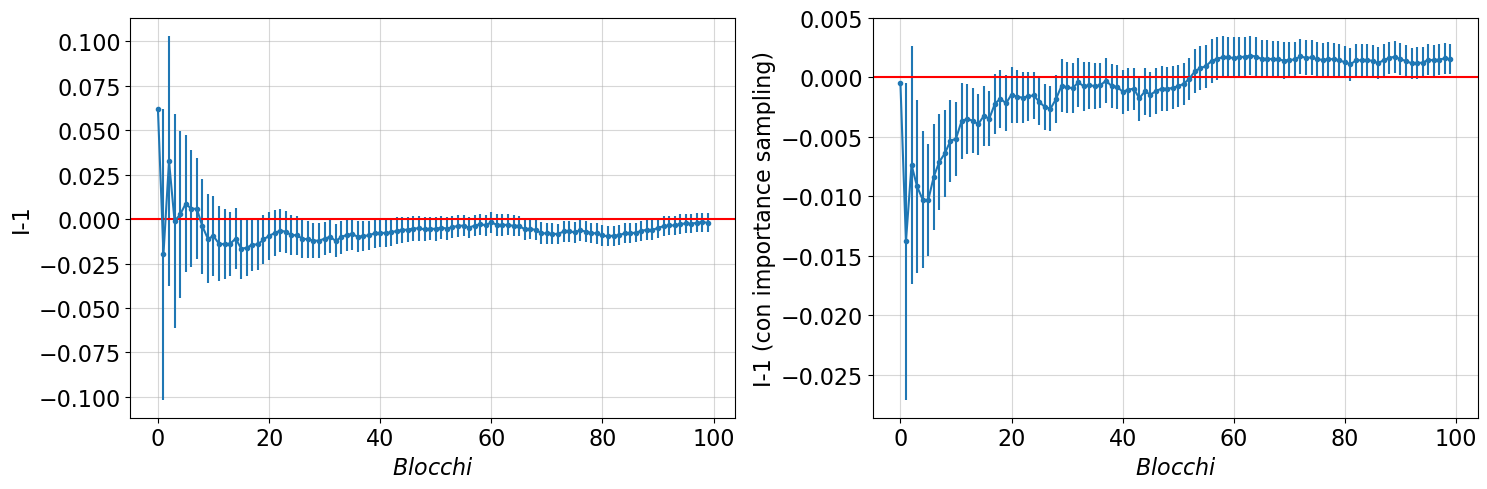

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

sum_prog,err_prog = np.loadtxt('./Esercizio_02.1/OUTPUT/output.dat', usecols = (0, 1), unpack = True)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
x = np.arange(len(sum_prog))
plt.errorbar(x,sum_prog-1,yerr=err_prog, linewidth=1.5, marker='o', markersize=3)
plt.axhline(y=0, color = 'r', linestyle = '-')
plt.xlabel('$Blocchi$', fontsize=16)
plt.ylabel('I-1', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, alpha=0.5)

sum_prog,err_prog = np.loadtxt('./Esercizio_02.1/OUTPUT/output_2.dat', usecols = (0, 1), unpack = True)

plt.subplot(1, 2, 2)
x = np.arange(len(sum_prog))
plt.errorbar(x,sum_prog-1,yerr=err_prog, linewidth=1.5, marker='o', markersize=3)
plt.axhline(y=0, color = 'r', linestyle = '-')
plt.xlabel('$Blocchi$', fontsize=16)
plt.ylabel('I-1 (con importance sampling)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

Di seguito sono riportate le stime di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ sia nel caso discreto che in quello continuo con le rispettive incertezze.

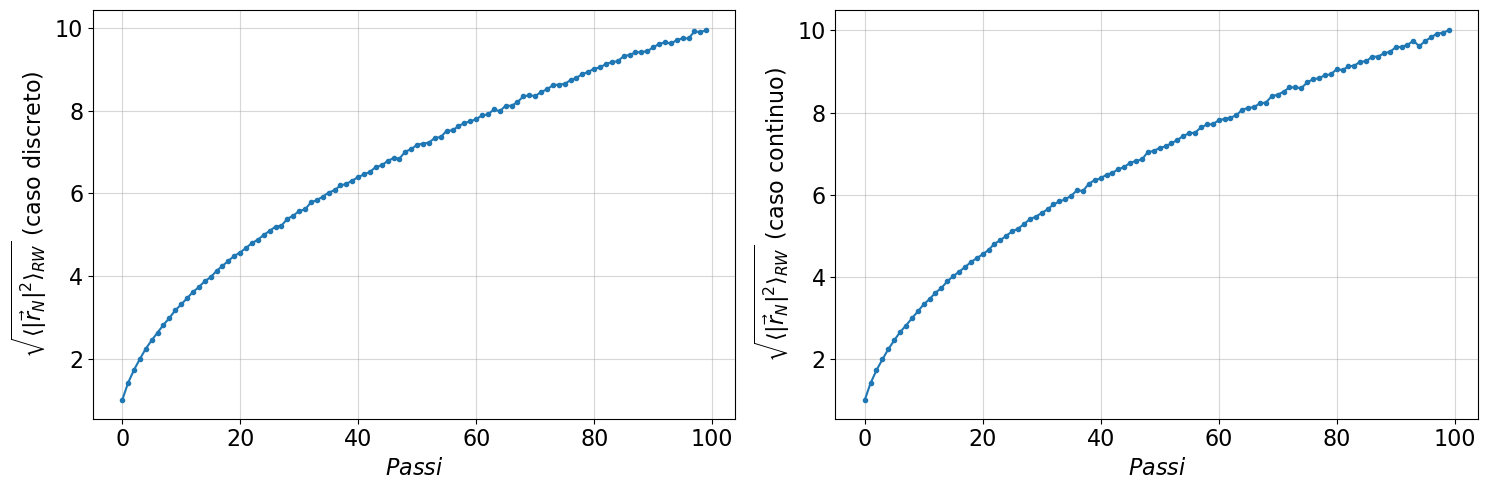

In [4]:
sum_prog,err_prog = np.loadtxt('./Esercizio_02.2/OUTPUT/output.dat', usecols = (0, 1), unpack = True)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
x = np.arange(len(sum_prog))
plt.errorbar(x,sum_prog,yerr=err_prog, linewidth=1.5, marker='o', markersize=3)
plt.xlabel('$Passi$', fontsize=16)
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ (caso discreto)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, alpha=0.5)

sum_prog,err_prog = np.loadtxt('./Esercizio_02.2/OUTPUT/output_2.dat', usecols = (0, 1), unpack = True)

plt.subplot(1, 2, 2)
x = np.arange(len(sum_prog))
plt.errorbar(x,sum_prog,yerr=err_prog, linewidth=1.5, marker='o', markersize=3)
plt.xlabel('$Passi$', fontsize=16)
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ (caso continuo)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

L'errore è molto piccolo, quasi impercettibile, ed è giustificato dalle fluttuazioni quasi inesistenti della stima che segue un fit molto "smooth".

È riportato inoltre una rappresentazione 3D del RW per 100 passi di esempio nei due casi.

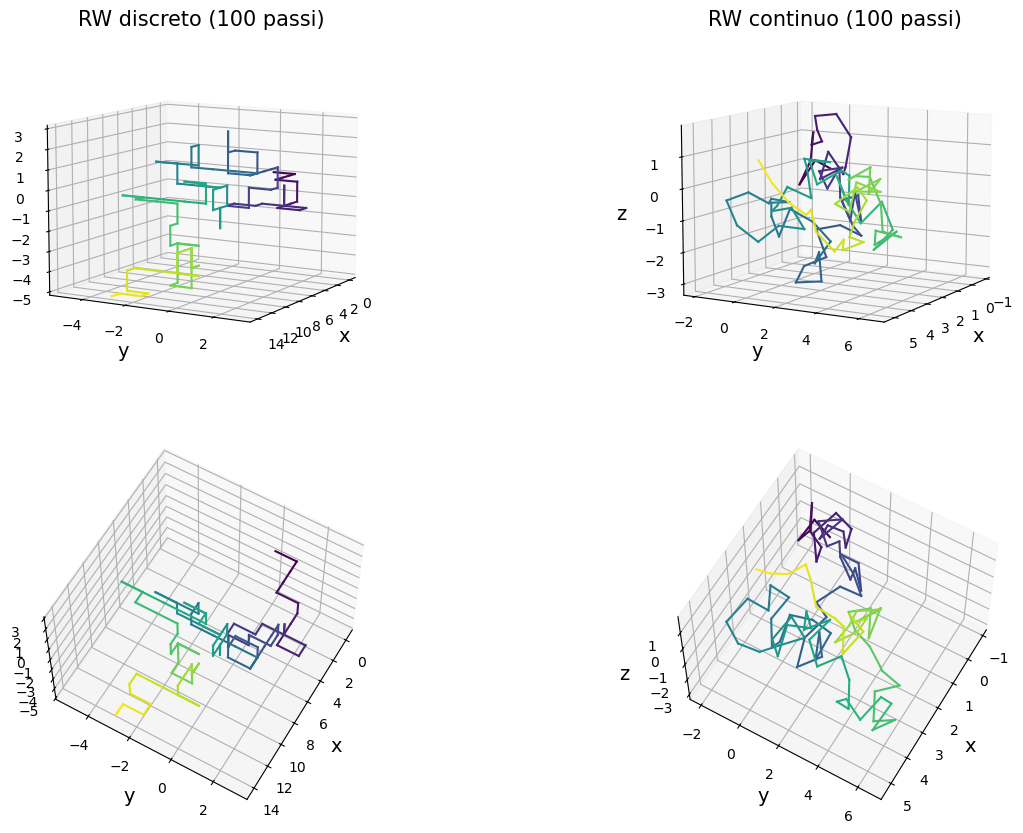

In [8]:
import matplotlib.cm as cm

i,x,y,z = np.loadtxt('./Esercizio_02.2/OUTPUT/position_dis.dat', usecols = (0, 1, 2, 3), unpack = True)

norm = plt.Normalize(i.min(), i.max())
colors = cm.viridis(norm(i))

fig = plt.figure(figsize = (15,10))
limsup = [20, 50]

ax = fig.add_subplot(2, 2, 1, projection = '3d')
ax.set_title('RW discreto (100 passi)',  fontsize = 15)
for j in range(len(x) - 1):
    ax.plot(x[j:j+2], y[j:j+2], z[j:j+2], color=colors[j])
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)
ax.set_zlabel('z', fontsize = 14)
ax.view_init(10,30)

ax = fig.add_subplot(2, 2, 3, projection = '3d')
for j in range(len(x) - 1):
    ax.plot(x[j:j+2], y[j:j+2], z[j:j+2], color=colors[j])
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)
ax.set_zlabel('z', fontsize = 14)
ax.view_init(60,30)

i,x,y,z = np.loadtxt('./Esercizio_02.2/OUTPUT/position_con.dat', usecols = (0, 1, 2, 3), unpack = True)

norm = plt.Normalize(i.min(), i.max())
colors = cm.viridis(norm(i))

ax = fig.add_subplot(2, 2, 2, projection = '3d')
ax.set_title('RW continuo (100 passi)',  fontsize = 15)
for j in range(len(x) - 1):
    ax.plot(x[j:j+2], y[j:j+2], z[j:j+2], color=colors[j])
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)
ax.set_zlabel('z', fontsize = 14)
ax.view_init(10,30)

ax = fig.add_subplot(2, 2, 4, projection = '3d')
for j in range(len(x) - 1):
    ax.plot(x[j:j+2], y[j:j+2], z[j:j+2], color=colors[j])
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)
ax.set_zlabel('z', fontsize = 14)
ax.view_init(60,30)

plt.show()

